In [56]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('adult.csv')

train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [60]:
train['sex'] = train['sex'].map({'Male': 0, 'Female': 1})

# میانگین برای سن
train['age'] = train['age'].fillna(train['age'].median())

# حذف ستون‌ های غیرضروری
train = train.drop(['marital.status', 'relationship', 'race', 'native.country', 'fnlwgt'], axis=1)

# features و target
X = train.drop('income', axis=1)
y = train['income'].map({'<=50K': 0, '>50K': 1})

# جایگزینی مقادیر ?
X['workclass'] = X['workclass'].replace('?', 'Unknown')
X['occupation'] = X['occupation'].replace('?', 'Unknown')

# تبدیل ستون های کتگوریکال از ابجکت به عدد
categorical_cols = ['workclass', 'education', 'occupation']
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
ada_model = AdaBoostClassifier(
    n_estimators=50,
    algorithm='SAMME', 
    random_state=42
)
ada_model.fit(X_train, y_train)

y_pred_ada = ada_model.predict(X_val)

acc_ada = accuracy_score(y_val, y_pred_ada)
print("AdaBoost Accuracy:", acc_ada)

AdaBoost Accuracy: 0.8395516658989712


In [68]:
gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_val)

acc_gb = accuracy_score(y_val, y_pred_gb)
print("Gradient Boosting Accuracy:", acc_gb)

Gradient Boosting Accuracy: 0.8542914171656687


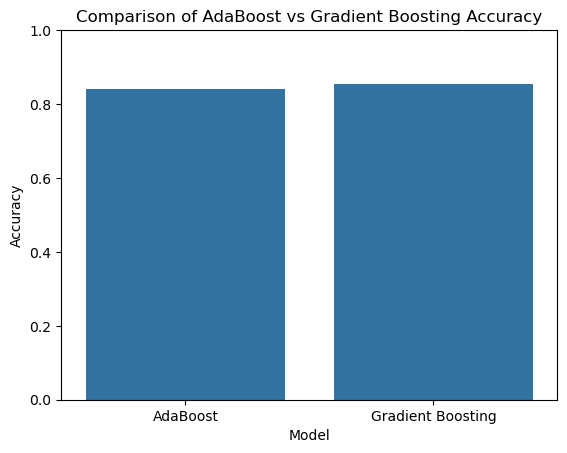

In [70]:
accuracy_df = pd.DataFrame({
    'Model': ['AdaBoost', 'Gradient Boosting'],
    'Accuracy': [acc_ada, acc_gb]
})

# رسم نمودار
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.ylim(0, 1)
plt.title("Comparison of AdaBoost vs Gradient Boosting Accuracy")
plt.show()


--------------------------------------------------------------

ابتدا رندوم فارست رو اجرا کردم و دقتش روی داده‌های ولیدیشن شد 0.825 بعد مدل ادابوست رو تست کردم و دقتش کمی بهتر شد حدودا 0.84 در نهایت گرادیانت بوستینگ رو امتحان کردم که بهترین عملکرد رو داشت و دقتش رسید به 0.845.
یعنی در نهایت دقت با اخرین مدل به 85% رسید